In [1]:
import numpy as np
from matplotlib import pyplot as plt
from simi.utils import lorentzian,lorentzian_half
from simi.args import qubit_args,us,MHz,pi
from scipy import integrate



T1: 30.00 us
T2: 15.00 us
T2 limit: 21.22 kHz
broadening condition:
14.142135623730953 kHz


/Users/asafsolonnikov/Developer/amplitude-robust-spectroscopy/simi/utils.py:193: RuntimeWarning: invalid value encountered in scalar power
  sigma = ((pulse_length / 2) ** 2 / ((1 / cutoff ** (1 / n)) - 1)) ** (1 / 2)
/var/folders/5l/mx_yndbx4sq978lx9ht2346r0000gn/T/ipykernel_6552/3380332701.py:11: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  result, error = integrate.quad(


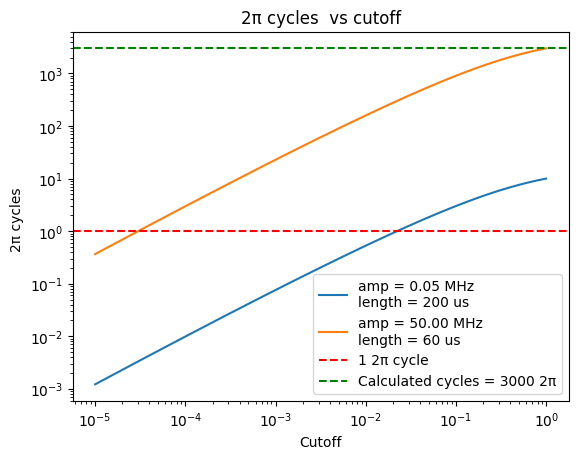

In [2]:
def find_action(qubit_args, plot=False):
    pulse_length = qubit_args['pulse_length']

    n = int(1e5)

    ts = np.linspace(-pulse_length/2, pulse_length/2, n)

    def lorentzian_func(t, args):
        return lorentzian(t, args)*qubit_args['rabi_frequency']

    result, error = integrate.quad(
        lorentzian_func, -pulse_length/2, pulse_length/2, args=(qubit_args,))

    result
    if plot:
        plt.plot(ts/us, lorentzian(ts, qubit_args))
        plt.title(f"Integral: {result:.1e} ± {error:.1e}")
        plt.ylim(0, 1.1)
        plt.xlabel("Time (us)")
        plt.ylabel("Amplitude")
        plt.show()

    return result, error


def find_actions(amp,length,qubit_args, cutoffs=np.logspace(-5, 1, 1000)):



    square_cycles = amp * length/(2 * np.pi)

    qubit_args['rabi_frequency'] = amp
    qubit_args['pulse_length'] = length

    cutoffs = np.logspace(-5, 1, 1000)
    y = []
    for c in cutoffs:
        qubit_args['cutoff'] = c
        result, error = find_action(qubit_args, plot=False)
        y.append(result)

    y = np.array(y)/2/pi

    return cutoffs, y, amp, length, square_cycles


cutoffs, y, amp, length, square_cycles = find_actions(50 * 2 * np.pi * MHz, 60 * us, qubit_args)

cutoffs, y, amp, length, square_cycles = find_actions(0.05 * 2 * np.pi * MHz, 200 * us, qubit_args)

amps = np.array([0.05,50]) * 2 * np.pi * MHz
lengths = np.array([200,60]) * us

for amp,length in zip(amps,lengths):
    cutoffs, y, amp, length, square_cycles = find_actions(amp, length, qubit_args)
    plt.plot(cutoffs, y,
            label=f'amp = {amp/2/pi/MHz:.2f} MHz \nlength = {length/us:.0f} us')
    
plt.xlabel("Cutoff")
plt.ylabel("2π cycles ")
plt.title("2π cycles  vs cutoff")
plt.xscale("log")
plt.yscale("log")
plt.axhline(1, color='red', linestyle='--', label='1 2π cycle')
# plt.ylim(1e-3, 1e3)
plt.axhline(square_cycles, color='green', linestyle='--',
            label=f'Calculated cycles = {square_cycles:.0f} 2π')
plt.legend()
plt.show()